Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating th

Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating the condition! 
Violating th

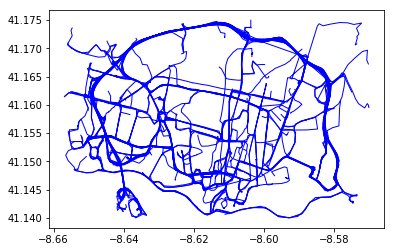

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial import distance
import os
from haversine import haversine
import utm
import _pickle as cPickle

#XMIN, YMIN = -8.72029, 41.0805
#XMAX, YMAX = -8.48563, 41.2711

XMIN, YMIN = -8.66, 41.14
XMAX, YMAX = -8.57, 41.175

def plot_trajectories(trajectories, color='b', lw='1'):
    fig, ax = plt.subplots()
    for traj in trajectories:
        ax.plot(traj[:,0], traj[:,1], color=color, lw=lw)

def plot_traj_length_histogram(lengths):
    fig, ax = plt.subplots()
    ax.hist(lengths, bins=100)

def get_distance_threshold(xy):
    d = [haversine( [xy[i][1], xy[i][0]], [xy[i+1][1],xy[i+1][0]] ) for i in range(len(xy)-1)]
    return np.percentile(d, 99.8), np.sum(d)

def isinsidebox(locations):
    xs, ys = locations[:,0], locations[:,1]
    x_violate = len(np.where(np.logical_or(np.less(xs,XMIN),np.greater(xs,XMAX)))[0])
    y_violate = len(np.where(np.logical_or(np.less(ys,YMIN),np.greater(ys,YMAX)))[0])
    if (x_violate==0 and y_violate==0):
        return True
    else:
        print("Violating the condition! ")

def read_lines(filename):
    i=0
    trajectories, lengths = [], []
    with open(filename) as f:
        next(f)
        for line in f:
            i=i+1
            #print(line)
            values=line.translate("".maketrans('','', '[]"\n')).split(',')
            #print(values)
            if (len(values) <= 9):
                continue
            locations = np.array(values[8:]).astype(np.float)
            locations = locations.reshape(int(len(locations)/2),2)
            if (len(locations) < 5):
                continue
            dist_threshold, traj_length = get_distance_threshold(locations)
            if (dist_threshold < 1 and traj_length > 5 and isinsidebox(locations) == True):
                trajectories.append(locations)
                lengths.append(traj_length)
            if (len(trajectories) >= 100):
                break
    #plot_traj_length_histogram(lengths)
    print("len:", len(trajectories))
    plot_trajectories(trajectories)
    np.save('gps_trajectories', trajectories)
    fp = open("pkdd100-box",'wb')
    cPickle.dump(trajectories,fp)
    fp.close()
    convert_utm(trajectories, "pkdd100-utm-box")

def convert_utm(trajectories, filename):
    traj_tometers = []
    for trajectory in trajectories:
        new_trajectory = []
        for (lat,lon) in trajectory:
            (x,y,_,_) = utm.from_latlon(lat,lon)
            new_trajectory.append([y,x])
        traj_tometers.append(new_trajectory)
    fp = open(filename,'wb')
    cPickle.dump(traj_tometers,fp)
    fp.close()

read_lines('/afs/inf.ed.ac.uk/user/s10/s1043682/Downloads/train.csv')
plt.show()